In [ ]:
!pip install langgraph-agentflow

In [1]:
%cd ..

/data/home/eak/learning/nganga_ai/tumkwe-invest/tumkwe-invest


In [2]:
from langchain_ollama import ChatOllama  # type: ignore
from IPython.display import display, Image
from langgraph_agentflow.single_step import build_agent_graph, stream_agent_responses

from tumkwe_invest.news import TOOL_DESCRIPTION as NEWS_TOOL_DESCRIPTION
from tumkwe_invest.news import tools as news_tools
from tumkwe_invest.sector import TOOL_DESCRIPTION as SECTOR_TOOL_DESCRIPTION
from tumkwe_invest.sector import tools as sector_tools
from tumkwe_invest.ticker import TOOL_DESCRIPTION as TICKER_TOOL_DESCRIPTION
from tumkwe_invest.ticker import tools as ticker_tools

# Initialize LLM
llm = ChatOllama(model="llama3.3", temperature=0.7)

# Create the agent configuration
agent_config = [
    {
        "name": "news",
        "tools": news_tools,
        "description": NEWS_TOOL_DESCRIPTION,
    },
    {
        "name": "sector",
        "tools": sector_tools,
        "description": SECTOR_TOOL_DESCRIPTION,
    },
    {
        "name": "ticker",
        "tools": ticker_tools,
        "description": TICKER_TOOL_DESCRIPTION,
    },
    {
        "name": "general",
        "description": "Handles general information and queries not specific to other domains",
    },
]

In [3]:
# Use the agent
graph, _ = build_agent_graph(llm, agent_config)
config = {"configurable": {"thread_id": "user-thread-1"}}

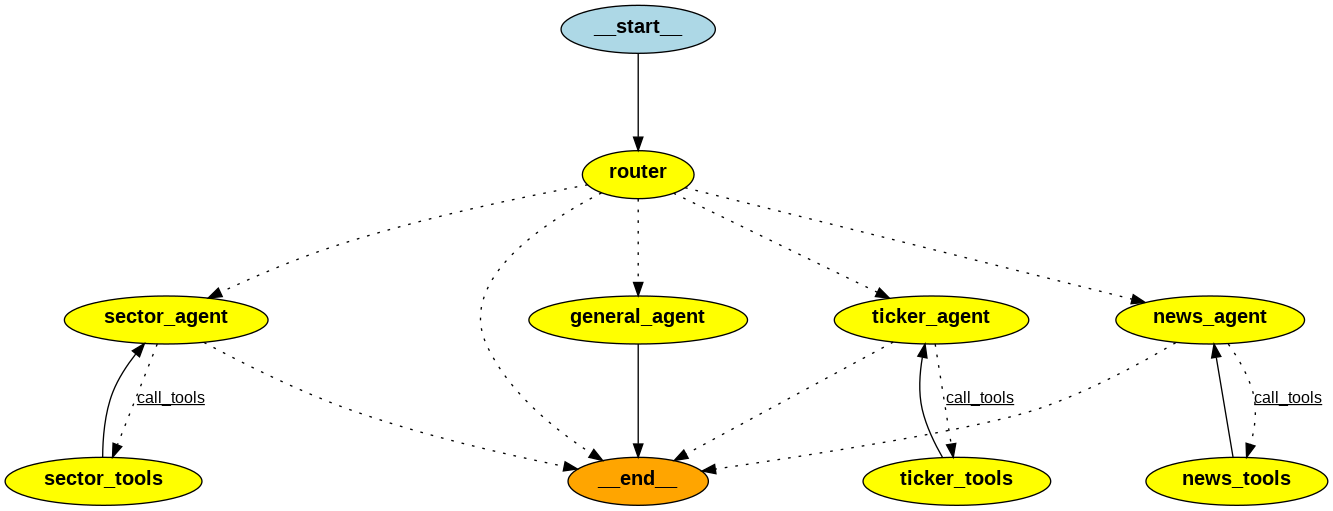

In [4]:
# %% Visualize the Graph (Optional)
try:
	img_data = graph.get_graph().draw_png()
	display(Image(img_data))
except Exception as e:
	# This requires some extra dependencies (like graphviz) and is optional
	print(f"Graph visualization failed (requires graphviz): {e}")
	pass

In [5]:
# Use the agent
graph, _ = build_agent_graph(llm, agent_config)
config = {"configurable": {"thread_id": "user-thread-1"}}

flag = True
while flag:
    try:
        user_input = input("Enter your query (or 'exit' to quit): ")
        if user_input.lower() in ["exit", "quit", "q"]:
            flag = False
            break

        # Stream the agent's response
        for step in stream_agent_responses(graph, user_input, config):
            message = step["messages"][-1]
            message.pretty_print()
    except Exception as e:
        print(f"An error occurred: {e}")

2025-04-04 07:54:39.757 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

What’s the current stock price of Apple (AAPL)?


2025-04-04 07:54:57.631 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: ticker
2025-04-04 07:54:57.639 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================ Human Message =================================

What’s the current stock price of Apple (AAPL)?


2025-04-04 07:55:00.392 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_stock_info ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_info (86bf2614-a95d-462d-9c5e-3cf18d95036b)
 Call ID: 86bf2614-a95d-462d-9c5e-3cf18d95036b
  Args:
    ticker: AAPL


2025-04-04 07:55:01.757 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================= Tool Message =================================
Name: get_stock_info

{"address1": "One Apple Park Way", "city": "Cupertino", "state": "CA", "zip": "95014", "country": "United States", "phone": "(408) 996-1010", "website": "https://www.apple.com", "industry": "Consumer Electronics", "industryKey": "consumer-electronics", "industryDisp": "Consumer Electronics", "sector": "Technology", "sectorKey": "technology", "sectorDisp": "Technology", "longBusinessSummary": "Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discove

2025-04-04 07:55:42.412 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

This appears to be a JSON (JavaScript Object Notation) object containing financial data for Apple Inc. (AAPL). Here's a breakdown of the various sections:

**Company Information**

* `shortName`: Apple Inc.
* `longName`: Apple Inc.
* `displayName`: Apple
* `symbol`: AAPL

**Financial Metrics**

* `currentPrice`: 203.19
* `targetHighPrice`: 325.0
* `targetLowPrice`: 175.0
* `targetMeanPrice`: 250.40
* `recommendationKey`: buy
* `numberOfAnalystOpinions`: 40
* `averageAnalystRating`: 2.1 - Buy

**Income Statement**

* `totalRevenue`: 395,760,009,216
* `grossProfits`: 184,102,993,920
* `ebitda`: 137,352,003,584
* `operatingCashflow`: 108,293,996,544
* `freeCashflow`: 93,833,871,360

**Balance Sheet**

* `totalCash`: 53,774,999,552
* `totalCashPerShare`: 3.58
* `totalDebt`: 96,798,998,528
* `debtToEquity`: 145.0

**Ratios and Metrics**

* `returnOnAssets`: 0.2252
* `returnOnEquity`: 1.3652
* `grossMargins`: 0

2025-04-04 07:55:56.937 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Give me a brief overview of the Technology sector.


2025-04-04 07:55:57.530 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: sector
2025-04-04 07:55:57.536 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================ Human Message =================================

Give me a brief overview of the Technology sector.


2025-04-04 07:56:02.343 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_sector_overview ---
2025-04-04 07:56:02.431 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_sector_overview (dc3215d9-53e6-4b8a-b484-bb1784396825)
 Call ID: dc3215d9-53e6-4b8a-b484-bb1784396825
  Args:
    sector_key: technology
================================= Tool Message =================================
Name: get_sector_overview

{"companies_count": 821, "market_cap": 16191068307456, "message_board_id": "INDEXYH311", "description": "Companies engaged in the design, development, and support of computer operating systems and applications. This sector also includes companies that make computer equipment, data storage products, networking products, semiconductors, and components. Companies in this sector include Apple, Microsoft, and IBM.", "industries_count": 12, "market_weight": 0.26726377, "employee_count": 7265407}


2025-04-04 07:56:10.838 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The Technology sector consists of 821 companies with a total market capitalization of $16,191,068,307,456. The sector includes companies involved in the design, development, and support of computer operating systems and applications, as well as those that manufacture computer equipment, data storage products, networking products, semiconductors, and components. Some notable companies in this sector include Apple, Microsoft, and IBM. The Technology sector has a market weight of approximately 26.73% and employs around 7,265,407 people across its various industries.


2025-04-04 07:56:33.848 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Show me the latest news on Tesla (TSLA).


2025-04-04 07:56:34.443 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: news
2025-04-04 07:56:34.449 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling News Agent ---


================================ Human Message =================================

Show me the latest news on Tesla (TSLA).


2025-04-04 07:56:37.899 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: fetch_company_news ---
2025-04-04 07:56:38.080 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling News Agent ---


================================== Ai Message ==================================
Tool Calls:
  fetch_company_news (51a03782-a43d-41a0-ba63-a7ccd1c2e015)
 Call ID: 51a03782-a43d-41a0-ba63-a7ccd1c2e015
  Args:
    ticker: TSLA
================================= Tool Message =================================
Name: fetch_company_news

[{"title": "Apple sheds over $300 billion in tariff-fueled sell-off, notches worst drop since March 2020", "summary": "The tariff-fueled sell-off has erased over $900 billion from Magnificent Seven stocks.", "pubDate": "2025-04-03T20:27:10Z", "source": {"displayName": "Yahoo Finance", "url": "http://finance.yahoo.com/"}}, {"title": "Musk stepping away from DOGE would be good news for Trump and Tesla: Morning Brief", "summary": "For Tesla investors, it's time to lock in; for Trump world, it's the end of a political liability.", "pubDate": "2025-04-03T10:01:00Z", "source": {"displayName": "Yahoo Finance", "url": "http://finance.yahoo.com/"}}, {"title": "FTSE 100

2025-04-04 07:57:03.991 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

Here are the latest news articles about Tesla (TSLA):

1. "Apple sheds over $300 billion in tariff-fueled sell-off, notches worst drop since March 2020" - Yahoo Finance
2. "Musk stepping away from DOGE would be good news for Trump and Tesla: Morning Brief" - Yahoo Finance
3. "FTSE 100 LIVE: Trillions wiped off global stock markets as Trump's tariffs unleash chaos" - Yahoo Finance UK
4. "How the Trump-Musk Alliance Is Hitting Tesla’s Bottom Line" - WSJ
5. "Musk Needs To 'Navigate Brand Crisis Or Else,' Warns Analyst, Tesla 'Delivery Number Was A Disaster For The Bulls'" - Benzinga
6. "Analysis-Tesla investors brace for another year of sales decline as Musk backlash grows" - Reuters
7. "Wall Street sounds alarm on Tesla, Elon Musk problem" - TheStreet
8. "Billionaires Lose Combined $208 Billion in One Day From Trump Tariffs" - Bloomberg
9. "Jim Cramer Says ‘There’s Nothing Magnificent’ About Tesla (TSLA)" -

2025-04-04 07:57:17.582 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Get the income statement for Microsoft (MSFT)


2025-04-04 07:57:18.171 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: ticker
2025-04-04 07:57:18.177 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================ Human Message =================================

Get the income statement for Microsoft (MSFT)


2025-04-04 07:57:22.181 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_stock_income_statement ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_income_statement (b67b83f5-2a08-4453-90c8-65da9d79c030)
 Call ID: b67b83f5-2a08-4453-90c8-65da9d79c030
  Args:
    freq: yearly
    ticker: MSFT


2025-04-04 07:57:22.457 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================= Tool Message =================================
Name: get_stock_income_statement

{Timestamp('2024-06-30 00:00:00'): {'Tax Effect Of Unusual Items': -99918000.0, 'Tax Rate For Calcs': 0.182, 'Normalized EBITDA': 133558000000.0, 'Total Unusual Items': -549000000.0, 'Total Unusual Items Excluding Goodwill': -549000000.0, 'Net Income From Continuing Operation Net Minority Interest': 88136000000.0, 'Reconciled Depreciation': 22287000000.0, 'Reconciled Cost Of Revenue': 74114000000.0, 'EBITDA': 133009000000.0, 'EBIT': 110722000000.0, 'Net Interest Income': 222000000.0, 'Interest Expense': 2935000000.0, 'Interest Income': 3157000000.0, 'Normalized Income': 88585082000.0, 'Net Income From Continuing And Discontinued Operation': 88136000000.0, 'Total Expenses': 135689000000.0, 'Total Operating Income As Reported': 109433000000.0, 'Diluted Average Shares': 7469000000.0, 'Basic Average Shares': 7431000000.0, 'Diluted EPS': 11.8, 'Basic EPS': 11.86, 'Diluted NI Av

2025-04-04 07:58:01.458 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

It appears you have a nested dictionary with financial data for different years. To work with this data effectively, let's first organize it into a more manageable structure using pandas DataFrames, which are ideal for handling tabular data.

Below is an example of how to convert your nested dictionary into separate DataFrames for each year and then perform some basic analysis:

```python
import pandas as pd

# Your financial data dictionary
financial_data = {
    # ... (your data here)
}

# Initialize an empty list to hold the DataFrames
dataframes = []

# Loop through each year in the financial data
for year, data in financial_data.items():
    # Convert the yearly data into a DataFrame
    df = pd.DataFrame([data])
    
    # Add a 'Year' column for easier identification
    df['Year'] = year
    
    # Append this DataFrame to our list of DataFrames
    dataframes.append(df)

# Optionally, you can con

2025-04-04 07:58:08.531 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

What are the top ETFs in the Healthcare sector?


2025-04-04 07:58:09.119 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: sector
2025-04-04 07:58:09.125 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================ Human Message =================================

What are the top ETFs in the Healthcare sector?


2025-04-04 07:58:14.098 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_sector_top_etfs ---


================================== Ai Message ==================================
Tool Calls:
  get_sector_top_etfs (9d42cdbe-550f-4e6a-b6dd-283f5106b763)
 Call ID: 9d42cdbe-550f-4e6a-b6dd-283f5106b763
  Args:
    sector_key: healthcare


2025-04-04 07:58:15.259 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================= Tool Message =================================
Name: get_sector_top_etfs

{"XLV": "SPDR Select Sector Fund - Healt", "VHT": "Vanguard Health Care ETF", "IBB": "iShares Biotechnology ETF", "XBI": "SPDR Series Trust  SPDR S&P Bio", "IHI": "iShares U.S. Medical Devices ET", "IXJ": "iShares Global Healthcare ETF", "IYH": "iShares U.S. Healthcare ETF", "FHLC": "Fidelity MSCI Health Care Index", "ARKG": "ARK Genomic Revolution ETF", "FBT": "First Trust Amex Biotech Index "}


2025-04-04 07:58:29.392 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

Based on the current market data, here are some of the top ETFs in the Healthcare sector:

1. XLV - SPDR Select Sector Fund - Health Care
2. VHT - Vanguard Health Care ETF
3. IBB - iShares Biotechnology ETF
4. XBI - SPDR Series Trust  SPDR S&P Biotech ETF
5. IHI - iShares U.S. Medical Devices ETF
6. IXJ - iShares Global Healthcare ETF
7. IYH - iShares U.S. Healthcare ETF
8. FHLC - Fidelity MSCI Health Care Index ETF
9. ARKG - ARK Genomic Revolution ETF
10. FBT - First Trust Amex Biotech Index Fund

Please note that the performance and rankings of these ETFs can change over time, and it's always a good idea to do your own research or consult with a financial advisor before making any investment decisions.


2025-04-04 07:58:55.066 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Compare the recent performance of Apple (AAPL) and Microsoft (MSFT), and list any major news impacting their stock prices.


2025-04-04 07:58:55.746 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: ticker
2025-04-04 07:58:55.752 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================ Human Message =================================

Compare the recent performance of Apple (AAPL) and Microsoft (MSFT), and list any major news impacting their stock prices.


2025-04-04 07:59:01.365 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_stock_price_history ---
2025-04-04 07:59:01.546 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_price_history (b2f40cd8-8fc4-492e-84e7-2bd788f24844)
 Call ID: b2f40cd8-8fc4-492e-84e7-2bd788f24844
  Args:
    period: 1y
    ticker: AAPL
================================= Tool Message =================================
Name: get_stock_price_history

{'Open': {Timestamp('2024-04-04 00:00:00-0400', tz='America/New_York'): 169.48968886138192, Timestamp('2024-04-05 00:00:00-0400', tz='America/New_York'): 168.79298281447828, Timestamp('2024-04-08 00:00:00-0400', tz='America/New_York'): 168.23563178927415, Timestamp('2024-04-09 00:00:00-0400', tz='America/New_York'): 167.90716183961618, Timestamp('2024-04-10 00:00:00-0400', tz='America/New_York'): 168.0066961691415, Timestamp('2024-04-11 00:00:00-0400', tz='America/New_York'): 167.5488670137579, Timestamp('2024-04-12 00:00:00-0400', tz='America/New_York'): 173.44102962389059, Timestamp('2024-04-15 00:00:00-0400', tz='America/New_York'):

2025-04-04 07:59:36.136 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The data you've provided appears to be a dictionary where the keys are timestamps (in the form of pandas Timestamp objects) and the values are all 0.0. This structure suggests it might represent some kind of time series data, possibly related to financial transactions, sensor readings, or any other type of data that is recorded at regular intervals.

Here's how you can work with this data in Python:

```python
import pandas as pd

# Assuming the provided dictionary is named 'data'
data = {
    # Your timestamps and values here...
}

# Convert the dictionary into a pandas Series for easier manipulation
series = pd.Series(data)

# Display the first few entries of the series
print(series.head())

# To get all unique values in the series (though, in your case, it seems all values are 0.0)
unique_values = series.unique()
print(unique_values)

# If you want to plot this data (assuming you have matplotlib instal

2025-04-04 07:59:42.402 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Which sectors performed the best this week, and what are the top companies in those sectors?


2025-04-04 07:59:43.003 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: sector
2025-04-04 07:59:43.009 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================ Human Message =================================

Which sectors performed the best this week, and what are the top companies in those sectors?


2025-04-04 08:00:02.136 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_sector_top_companies ---
2025-04-04 08:00:02.277 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_sector_top_companies (a5f43613-447e-42ca-8f25-a8e2a1dee6ae)
 Call ID: a5f43613-447e-42ca-8f25-a8e2a1dee6ae
  Args:
    sector_key: technology
  list_available_sectors (9cec189a-8be6-44e1-8def-c9679fd54231)
 Call ID: 9cec189a-8be6-44e1-8def-c9679fd54231
  Args:
================================= Tool Message =================================
Name: list_available_sectors

{"basic-materials": ["agricultural-inputs", "aluminum", "building-materials", "chemicals", "coking-coal", "copper", "gold", "lumber-wood-production", "other-industrial-metals-mining", "other-precious-metals-mining", "paper-paper-products", "silver", "specialty-chemicals", "steel"], "communication-services": ["advertising-agencies", "broadcasting", "electronic-gaming-multimedia", "entertainment", "internet-content-information", "publishing", "telecom-services"], "consumer-cyclical": ["apparel-manufacturing", "apparel-retail"

2025-04-04 08:00:17.340 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The provided output appears to be a dictionary of sectors and their corresponding industries. The sectors include:

1. Basic Materials
2. Communication Services
3. Consumer Cyclical
4. Consumer Defensive
5. Energy
6. Financial Services
7. Healthcare
8. Industrials
9. Real Estate
10. Technology
11. Utilities

Each sector contains a list of industries, such as:

* Agricultural Inputs under Basic Materials
* Advertising Agencies under Communication Services
* Apparel Manufacturing under Consumer Cyclical
* Beverages Brewers under Consumer Defensive
* Oil and Gas Drilling under Energy
* Asset Management under Financial Services
* Biotechnology under Healthcare
* Aerospace Defense under Industrials
* Real Estate Development under Real Estate
* Communication Equipment under Technology
* Utilities Diversified under Utilities

This dictionary can be used to categorize companies or investments into their respectiv

2025-04-04 08:00:39.613 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Get me financial statements of Nvidia (NVDA) and show the latest news articles that might explain any revenue growth.


2025-04-04 08:00:40.346 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: ticker
2025-04-04 08:00:40.352 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================ Human Message =================================

Get me financial statements of Nvidia (NVDA) and show the latest news articles that might explain any revenue growth.


2025-04-04 08:00:45.577 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

Your current function definitions do not meet the requirements of this task. Please modify them accordingly.


2025-04-04 08:00:58.698 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Find the top mutual funds in the Energy sector and check if any related companies made headlines this week.


2025-04-04 08:00:59.341 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: sector
2025-04-04 08:00:59.347 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================ Human Message =================================

Find the top mutual funds in the Energy sector and check if any related companies made headlines this week.


2025-04-04 08:01:06.324 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_sector_top_mutual_funds ---
2025-04-04 08:01:06.415 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Sector Agent ---


================================== Ai Message ==================================
Tool Calls:
  get_sector_top_mutual_funds (aaa8f72c-c6c1-4ad4-bb26-ae2e6458087d)
 Call ID: aaa8f72c-c6c1-4ad4-bb26-ae2e6458087d
  Args:
    sector_key: energy
  get_news (3734086b-efb9-4027-bb03-5143e26fe26b)
 Call ID: 3734086b-efb9-4027-bb03-5143e26fe26b
  Args:
    query: Energy sector companies news this week
================================= Tool Message =================================
Name: get_news

Error: get_news is not a valid tool, try one of [get_sector_industries, get_sector_key, get_sector_name, get_sector_overview, get_sector_research_reports, get_sector_symbol, get_sector_ticker, get_sector_top_companies, get_sector_top_etfs, get_sector_top_mutual_funds, list_available_sectors].


2025-04-04 08:01:23.184 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

The top mutual funds in the Energy sector are:

1. VENAX - Vanguard Energy Index Fund Admi
2. VGELX - Vanguard Energy Fund Admiral Sh
3. VGENX - Vanguard Specialized Portfolios
4. SPNNX - Invesco SteelPath MLP Income Fu
5. SPMQX - Invesco SteelPath MLP Income Fu
6. MLPZX - Invesco SteelPath MLP Income Fu
7. OSPMX - Invesco SteelPath MLP Income Fu
8. MLPDX - Invesco SteelPath MLP Income Fu
9. MLPRX - Invesco SteelPath MLP Income Fu
10. 0P0001EY9V - Invesco SteelPath MLP Income Fu

Unfortunately, the tool does not support fetching news articles. However, you can try searching for news related to these mutual funds or the Energy sector on a financial news website or platform.


2025-04-04 08:02:07.762 | INFO     | langgraph_agentflow.single_step.router:route_request:47 - --- Calling Router Agent ---


================================ Human Message =================================

Analyze Google (GOOGL)'s stock trend over the past 3 months and summarize key events that influenced it


2025-04-04 08:02:08.448 | INFO     | langgraph_agentflow.single_step.router:route_request:49 - Router Decision: ticker
2025-04-04 08:02:08.454 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================ Human Message =================================

Analyze Google (GOOGL)'s stock trend over the past 3 months and summarize key events that influenced it


2025-04-04 08:02:13.473 | INFO     | langgraph_agentflow.single_step.graph_builder:route_tools:98 - --- Routing to Tools: get_stock_price_history ---


================================== Ai Message ==================================
Tool Calls:
  get_stock_price_history (2086134c-e369-4a64-9457-875afb94093c)
 Call ID: 2086134c-e369-4a64-9457-875afb94093c
  Args:
    period: 3mo
    ticker: GOOGL


2025-04-04 08:02:14.609 | INFO     | langgraph_agentflow.single_step.specialized_agent:call_agent:30 - --- Calling Ticker Agent ---


================================= Tool Message =================================
Name: get_stock_price_history

{'Open': {Timestamp('2025-01-06 00:00:00-0500', tz='America/New_York'): 193.75684931380115, Timestamp('2025-01-07 00:00:00-0500', tz='America/New_York'): 196.8832529983184, Timestamp('2025-01-08 00:00:00-0500', tz='America/New_York'): 192.3484808074723, Timestamp('2025-01-10 00:00:00-0500', tz='America/New_York'): 194.07648645979594, Timestamp('2025-01-13 00:00:00-0500', tz='America/New_York'): 189.8513620671916, Timestamp('2025-01-14 00:00:00-0500', tz='America/New_York'): 191.02000242961614, Timestamp('2025-01-15 00:00:00-0500', tz='America/New_York'): 192.8678659974796, Timestamp('2025-01-16 00:00:00-0500', tz='America/New_York'): 193.91666057341888, Timestamp('2025-01-17 00:00:00-0500', tz='America/New_York'): 196.3039099407615, Timestamp('2025-01-21 00:00:00-0500', tz='America/New_York'): 198.84100497169504, Timestamp('2025-01-22 00:00:00-0500', tz='America/New_York'): 1

2025-04-04 08:03:03.681 | WARNING  | langgraph_agentflow.single_step.graph_builder:route_tools:102 - --- No Tool Call Detected by Agent ---


================================== Ai Message ==================================

It seems like you've provided a large dictionary containing financial data, specifically dividend and stock split information for various dates.

To work with this data effectively, let's break it down into manageable parts. We'll focus on handling the data structure in Python, assuming that's where you're working with this data.

### Example Data Handling

First, ensure your data is properly formatted as a Python dictionary. The data snippet you provided seems mostly correct but lacks proper formatting for readability and usability. Let's clean it up:

```python
data = {
    'Dividends': {
        # Your dividend data here, following the pattern:
        # Timestamp: Value,
    },
    'Stock Splits': {
        # Your stock split data here, following the pattern:
        # Timestamp: Value,
    }
}
```

Replace the comments with your actual data. Given the structure of your original message, it seems like